# Marketing_Department_Clustering_Project

#### Author: Panagiotis Tamtakos
#### Summary: In this project consultance will be given to the marketing department of a bank by dividing the bank's customers into distinctive groups for the purpose of launching a targeted ad marketing campaign relating to the bank's customers. This project is organised as follows: (a) Exploratory data analysis and vizualization, (b) application of the K-means clustering method, (c) Dimensionality reduction with autoencoders, (d) Principal Component analysis

### Introduction:
* Marketing is crucial for the growth and sustainability of any business.
* Marketers can help build the company's brand, engage customers, grow revenue and increase sales.
* One of the key pain points for marketers is to know their customers and identify their needs.
* By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
* If data about the customers is available, data science can be applied to perform market segmentation.

#### In this project consultance will be given to a bank's marketing team in order to assist them in launching a targeted ad campaign. This will be done by analyzing the bank's customer data for the last six months and dividing the customers into distinctive groups.

## 0. Import the required libraries and read the data set.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
creditcard_df=pd.read_csv("Marketing_Data.csv")

In [8]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


###### Data dictionary
* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
* CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRC_FULL_PAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user


In [9]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 1. Data processing and visualization

#### (a) Check if there are any missing values in the dataset and replace them with the respective mean values

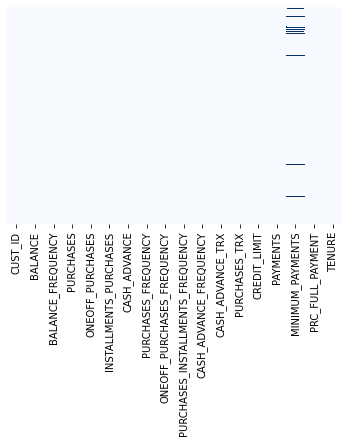

In [10]:
 sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### (b) Drop of the CUST_ID column since it doesn't provide any useful information

In [15]:
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [16]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### (c) Development of KDE plots for each feature

C:\Users\Tam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


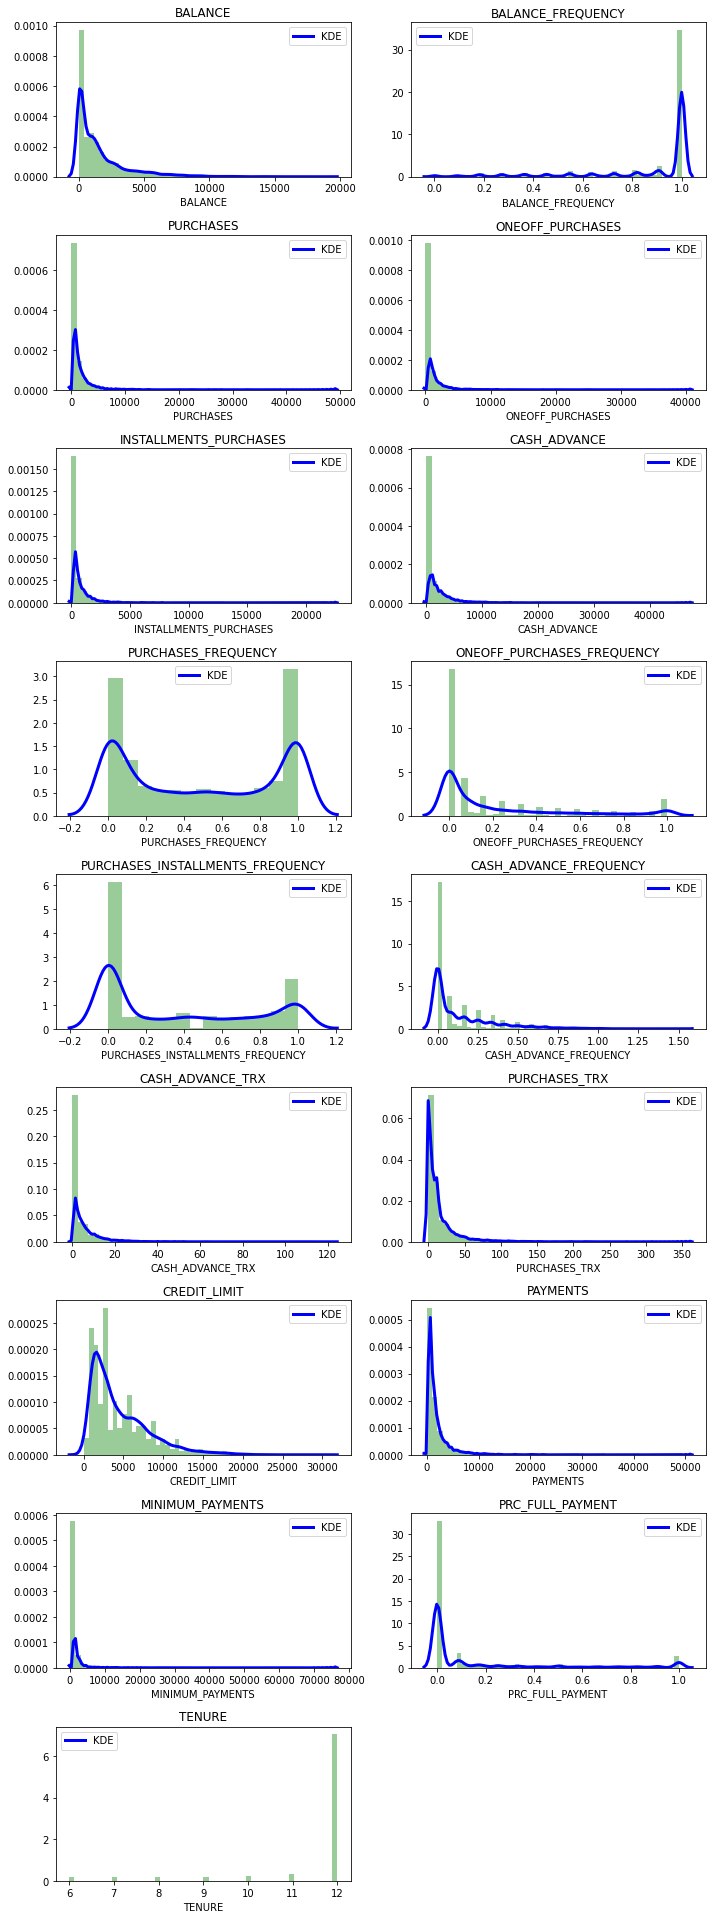

In [17]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 2, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

**Comments:**
* Mean balance is around 1500 dollars.
* 'Balance_Frequency' for most customers is updated frequently ~1.
* For 'PURCHASES_FREQUENCY', there are two distinct group of customers.
* For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently.
* Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT' ~0
* Credit limit average is around 4500 dollars
* Most customers are ~12 years tenure

#### (d) Correlations Matrix

In [18]:
correlations = creditcard_df.corr()

Text(0.5, 1.0, 'Correlations Matrix')

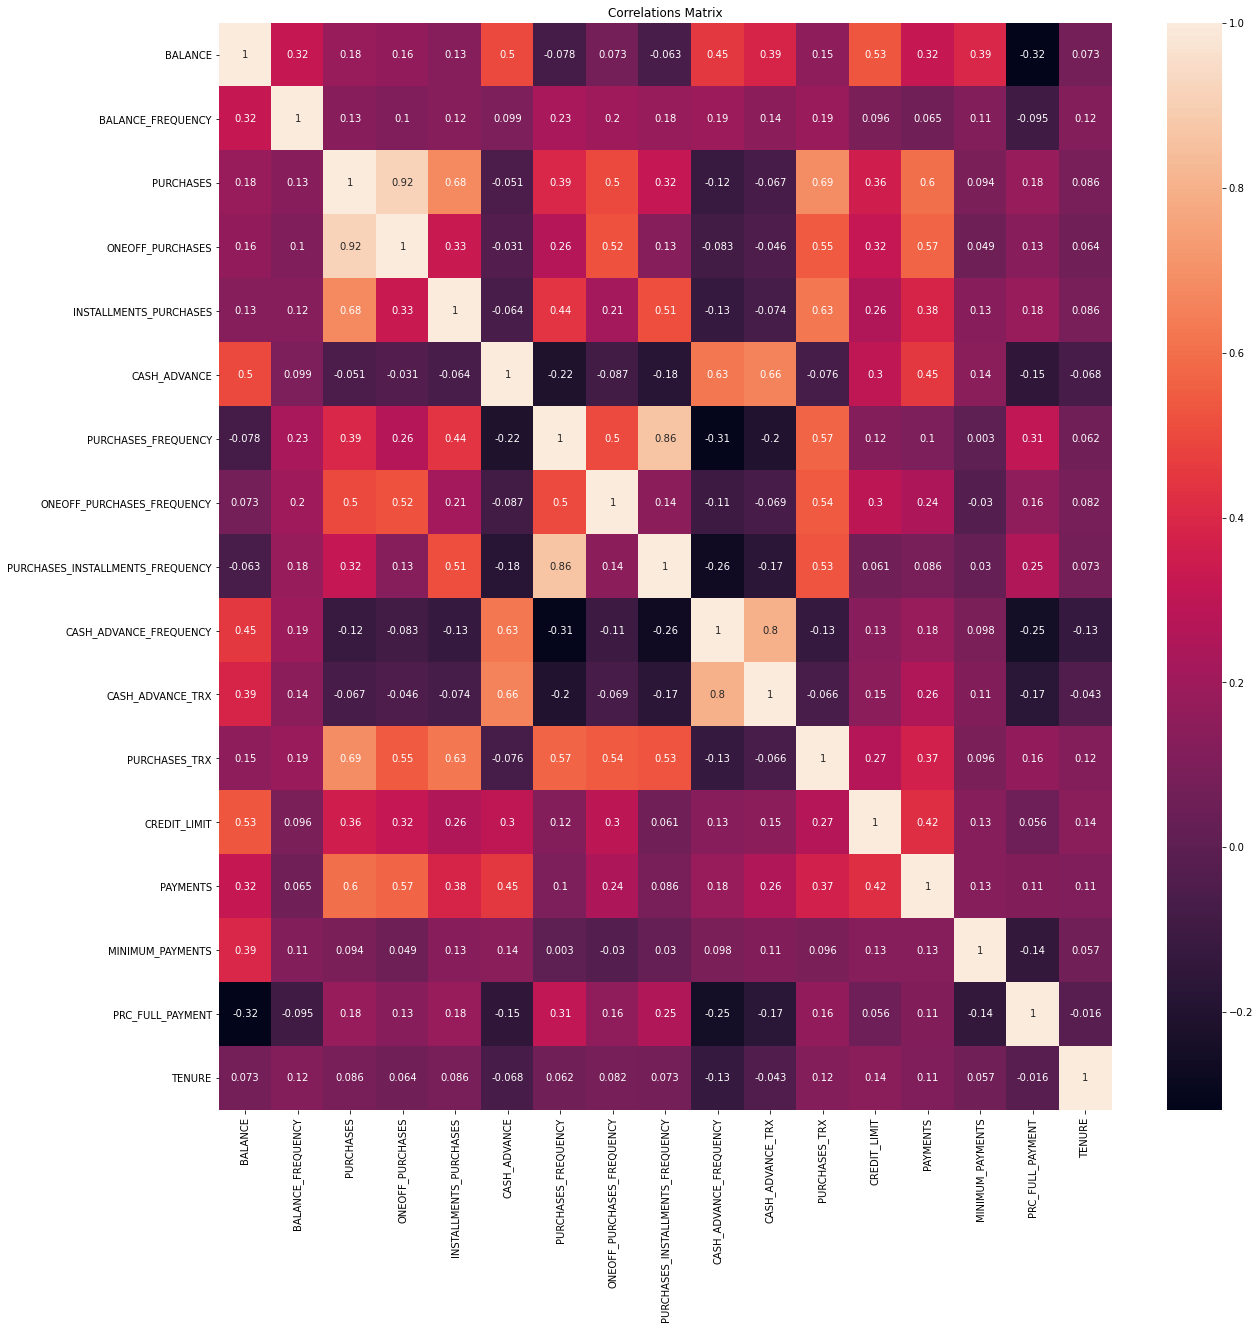

In [19]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.title('Correlations Matrix')

**Comments:**
* Purchases have high correlation between One-off_Purchases, Installment_Purchases, Purchase_Transactions, Credit_Limit and Payments.
* Strong positive correlation between Purchases_Frequency and Purchase_Installment_Frequency.

## 2. Application of K-Means clustering using the elbow method

#### (a) Scaling of the data in order for it to be suitable for the application of the clustering method

In [20]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

#### (b) Application of the elbow method to find the right number of clusters

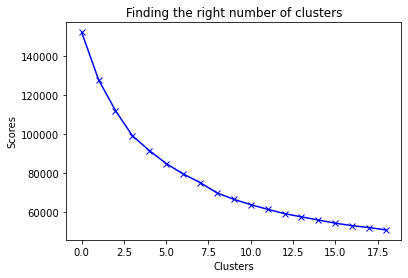

In [21]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

**Comments:**
* From this figure we observe that the 4rth cluster seems to be formating the elbow of the curve.
* However, the values do not linearly reduce until the 8th cluster.
* Therefore, we choose as a number of clusters 8!

#### (c) Application of K-Means method

In [22]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [23]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers      

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008386,0.403794,-0.356417,-0.241424,-0.399094,-0.099557,-0.849329,-0.393820,-0.751479,0.095062,-0.034810,-0.480702,-0.306297,-0.253021,-0.012628,-0.455999,0.274240
1,1.050934,0.464529,2.481755,1.792046,2.575784,-0.156467,1.163655,1.545767,1.271066,-0.281078,-0.146670,3.103433,1.295213,1.432598,0.655816,0.244117,0.337784
2,-0.365098,0.332378,-0.034776,-0.243728,0.365354,-0.361927,0.997069,-0.386860,1.210991,-0.472453,-0.359456,0.190776,-0.263465,-0.214945,-0.036369,0.319478,0.255476
3,1.674737,0.394612,-0.224875,-0.160872,-0.236229,2.000935,-0.486740,-0.214330,-0.425695,1.919078,1.921745,-0.275398,1.016045,0.797253,0.521842,-0.395232,0.070464
4,-0.333924,-0.345996,-0.288199,-0.214424,-0.287144,0.067515,-0.203348,-0.286554,-0.225256,0.309069,0.000876,-0.387867,-0.563134,-0.392745,-0.209087,0.013378,-3.200691
5,-0.129886,0.400182,0.537236,0.666346,0.045909,-0.329442,0.977544,1.893887,0.173576,-0.413126,-0.329145,0.614859,0.434517,0.146989,-0.156700,0.440912,0.269504
6,-0.700918,-2.143735,-0.310468,-0.235060,-0.302135,-0.319880,-0.555387,-0.443244,-0.439618,-0.520753,-0.376148,-0.419400,-0.172441,-0.191642,-0.256427,0.284813,0.200105
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


**Comment:** Here transformation of the clustered data into a dataframe is performed.

In [24]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1581.928951,0.972926,241.714121,191.722557,50.171586,770.094784,0.149474,0.084974,0.065780,0.154167,3.011277,2.761368,3380.016976,1000.673398,834.777946,0.020343,11.884322
1,3751.905849,0.987313,6305.512006,3566.866267,2740.317047,650.752612,0.957382,0.663590,0.869591,0.078898,2.247911,91.849582,9206.963788,5880.375178,2392.557333,0.225115,11.969359
2,804.554972,0.956008,928.905332,187.898692,741.452611,219.893631,0.890523,0.087050,0.845716,0.040601,0.795806,19.451822,3535.856317,1110.898957,779.449206,0.247157,11.859211
3,5050.299230,0.970751,522.755490,325.422790,197.448497,5174.925636,0.294998,0.138519,0.195255,0.519171,16.363326,7.864465,8191.235245,4041.111969,2080.336726,0.038116,11.611617
4,869.441195,0.795307,387.463654,236.537740,151.406683,1120.452630,0.408737,0.116973,0.274915,0.196992,3.254808,5.068910,2445.535977,596.186218,376.937132,0.157627,7.233974
5,1294.128566,0.972070,2151.017807,1698.435261,452.582546,288.016796,0.882686,0.767441,0.433421,0.052473,1.002653,29.992927,6075.399887,2158.663375,499.024794,0.282674,11.877984
6,105.573461,0.369440,339.885313,202.285601,137.850812,308.067290,0.267447,0.070229,0.189722,0.030936,0.681895,4.285110,3867.038447,1178.359551,266.613855,0.237018,11.785110
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


### *Comments:*
*By observing the clustered dataframe we can distinguish the groups of customers into distinct categories based on their characteristics:*
* 1st Customer Cluster  (row 6): **(Transactors)** Those are the customers who pay the least amount of interest charges and are careful with their money. Some characteristics that help us distinguish this cluster are the lowest balance (104 USD) and cash advance (303 USD) and percentage of full payments equal to 23%. 
* 2nd Customer Cluster (row 2):**(Revolvers)**.  Those are customers who use their credit card as a loan (most lucrative sector). Some characteristics that help us distinguish this cluster are the highest balance (5000 USD) and cash advance (5000 USD), low purchase frequency(~0.3), high advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%).
* 3rd Customer Cluster (row 5):**(VIP/Prime)**. Some characteristics that help us distinguish this cluster are the high credit limit (~16k USD) and the highest percentage of full payment.
* 4th Customer Cluster (row 7): **(Low Tenure)**. Some characteristics that help us distinguish this cluster are the low tenure (7 years) and low balance (868 USD).

#### (d) Concatonate the cluster labels to the original data set

In [25]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [26]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


#### (e) Histograms for various clusters

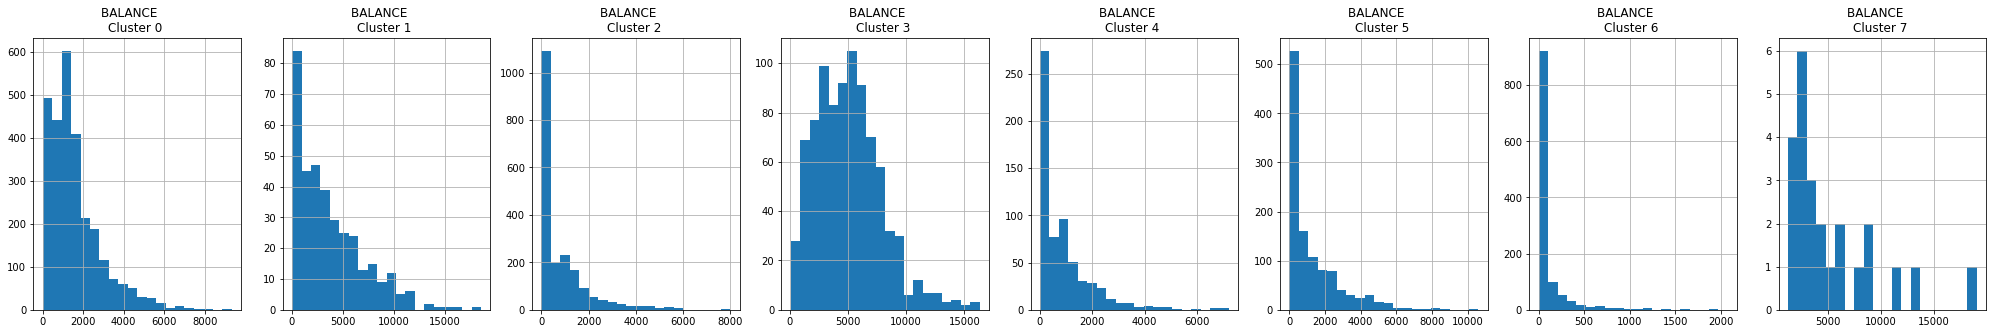

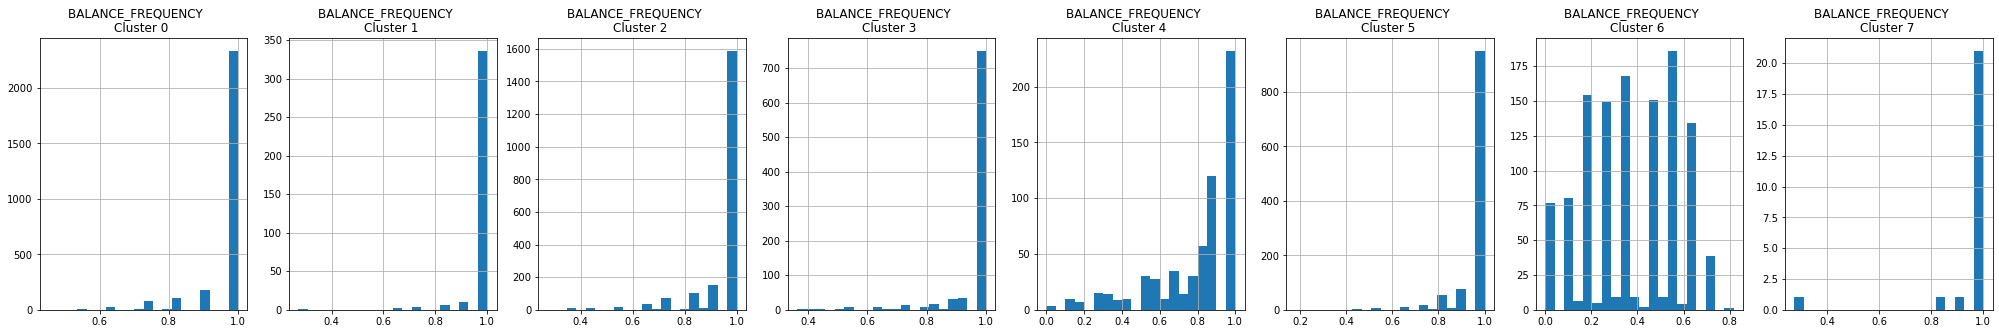

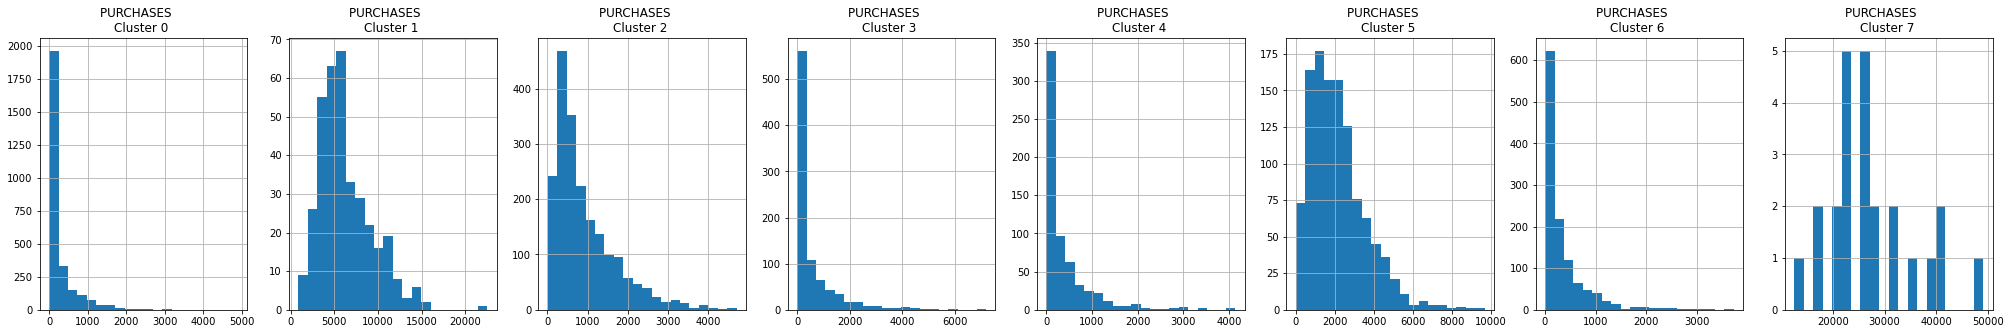

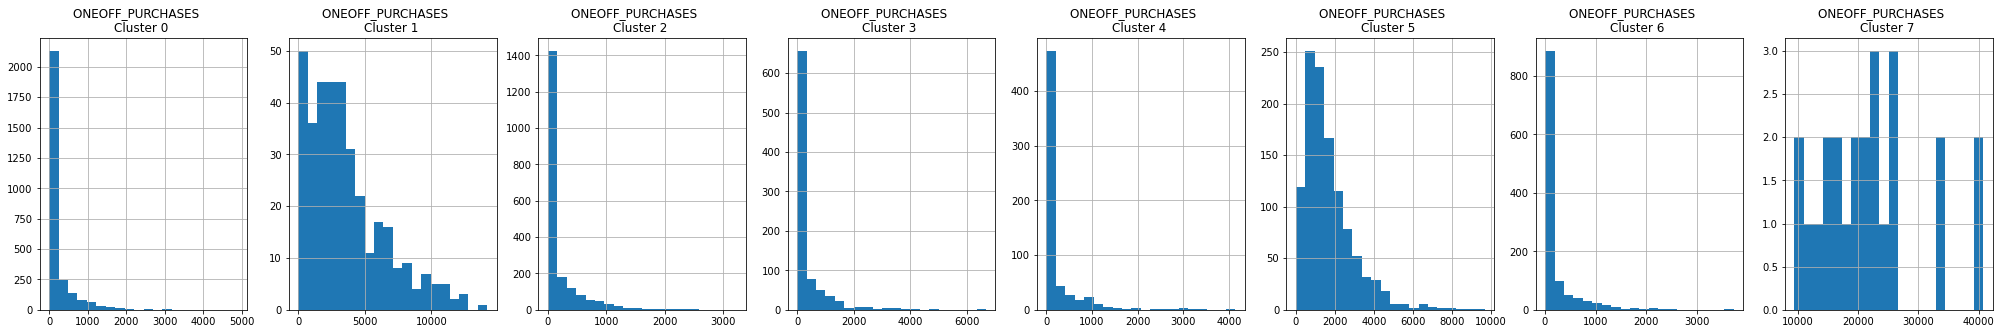

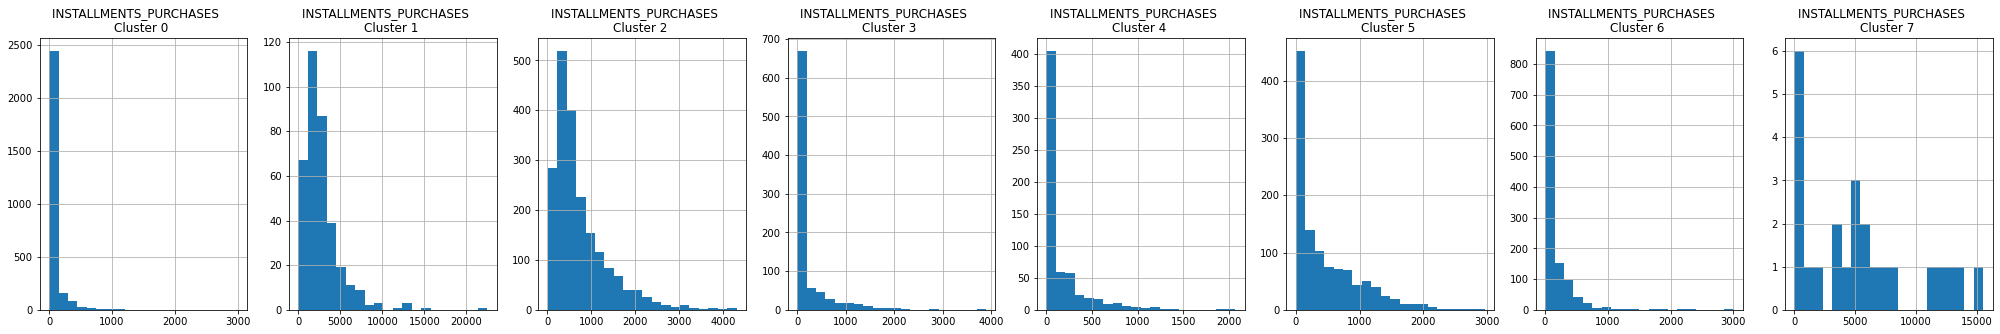

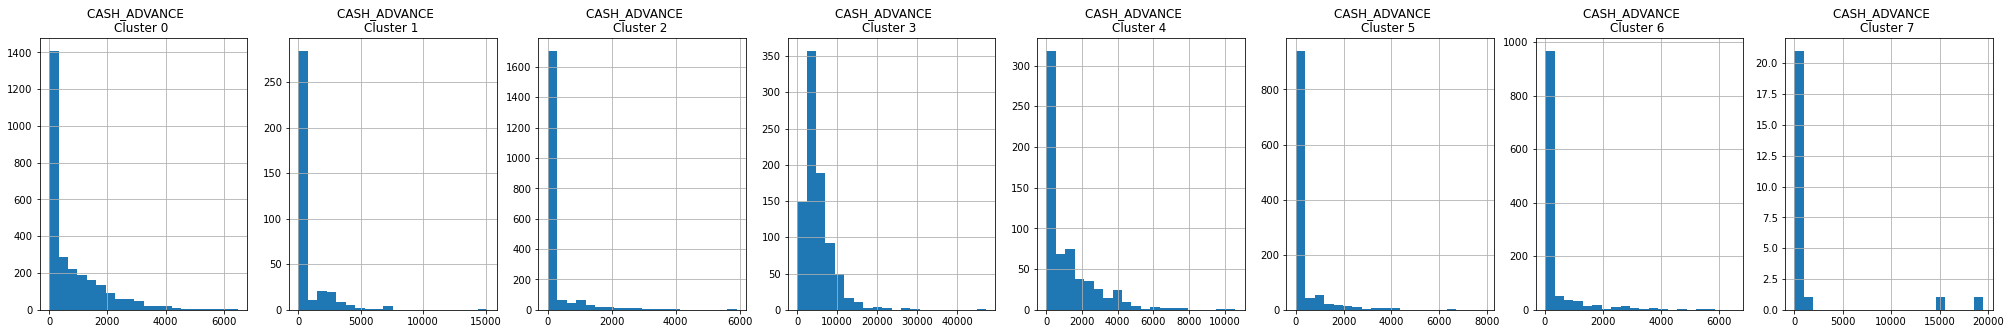

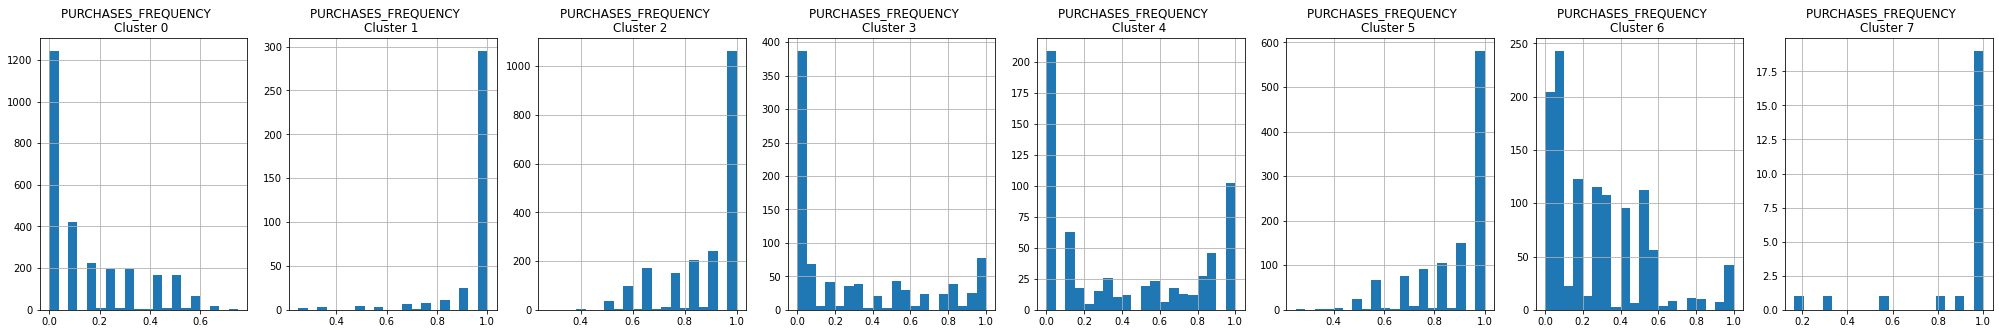

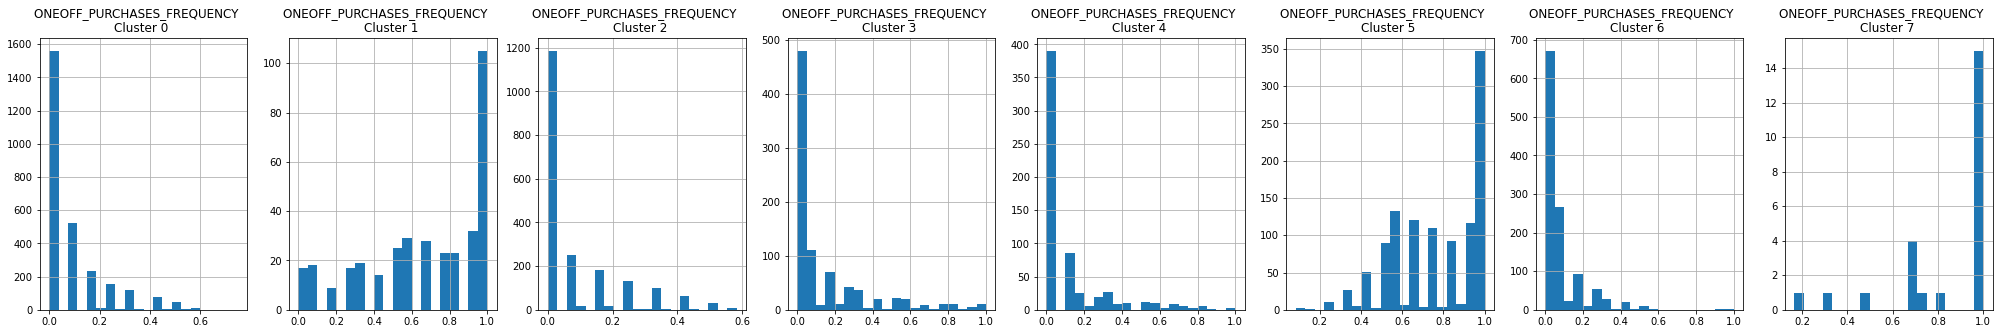

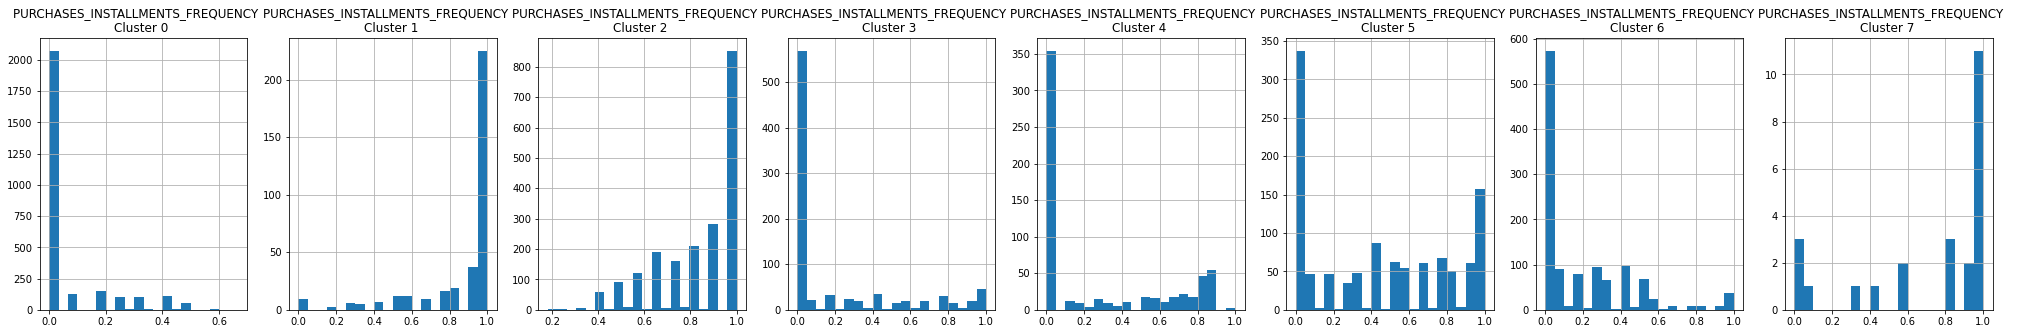

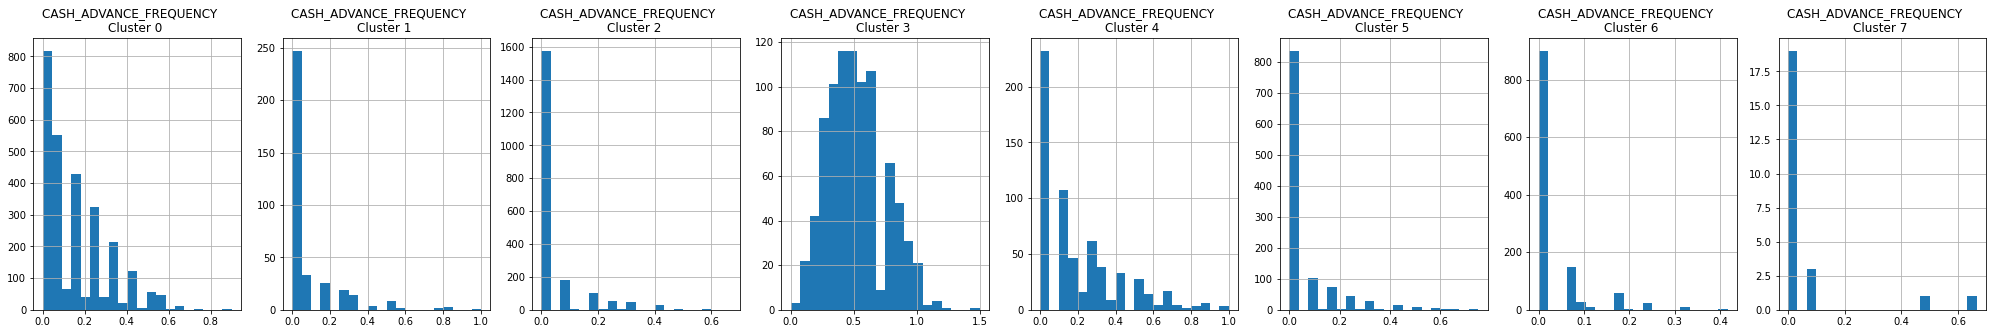

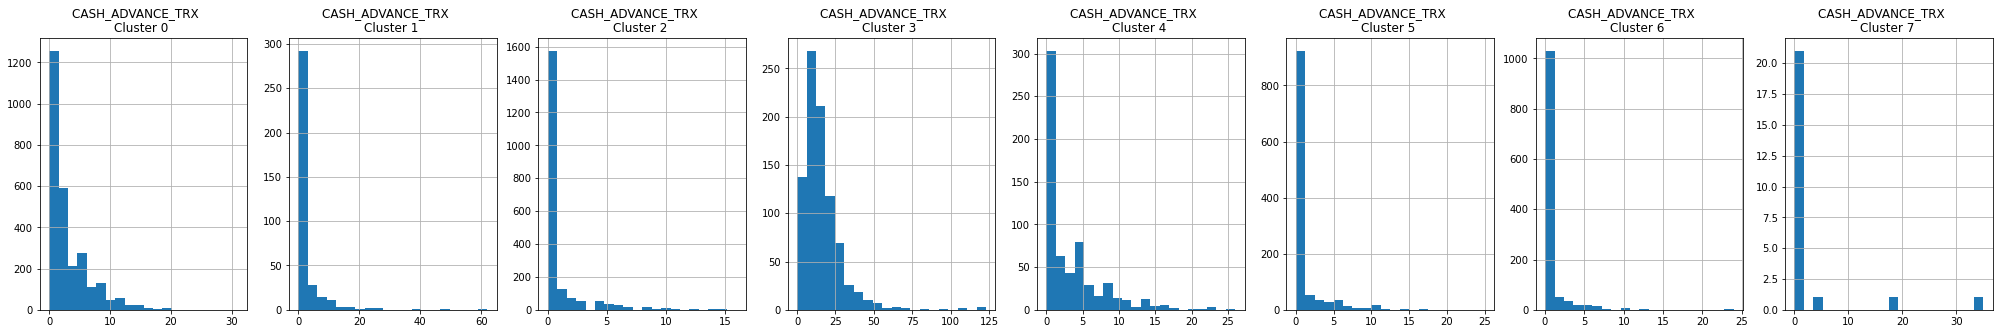

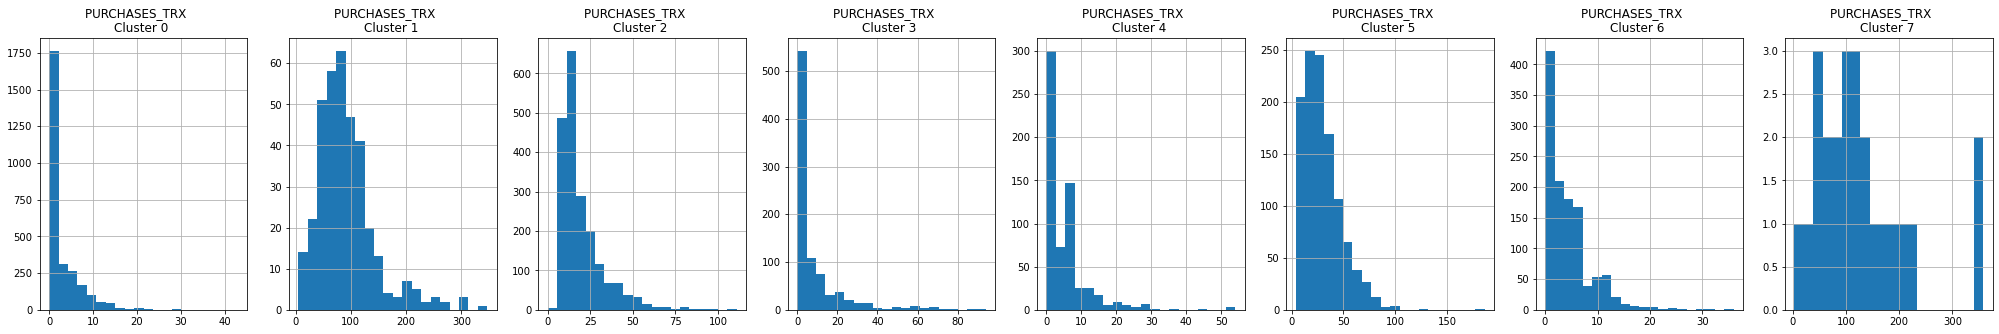

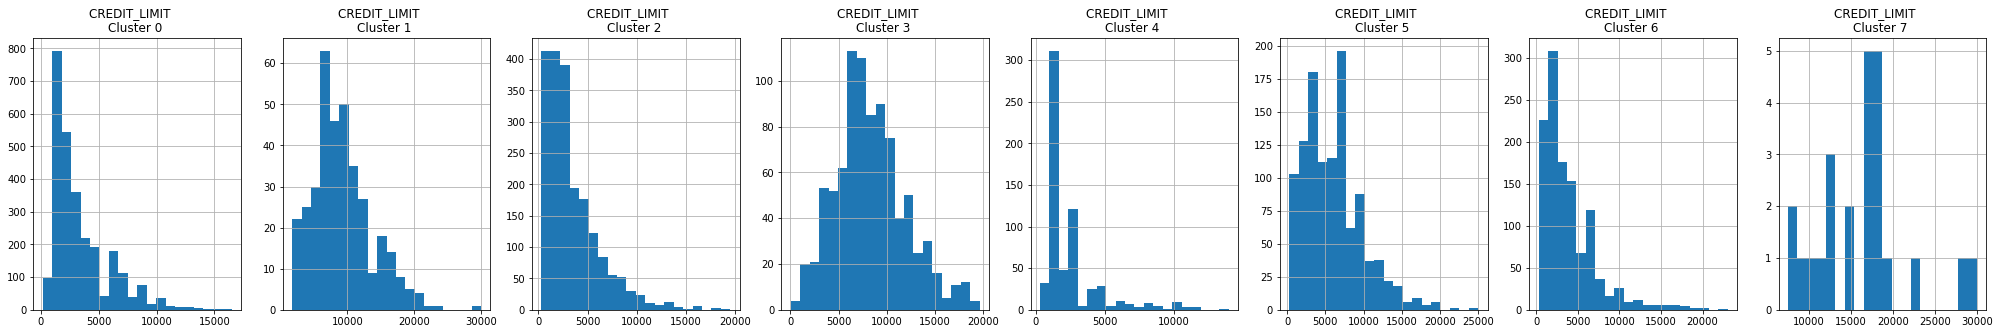

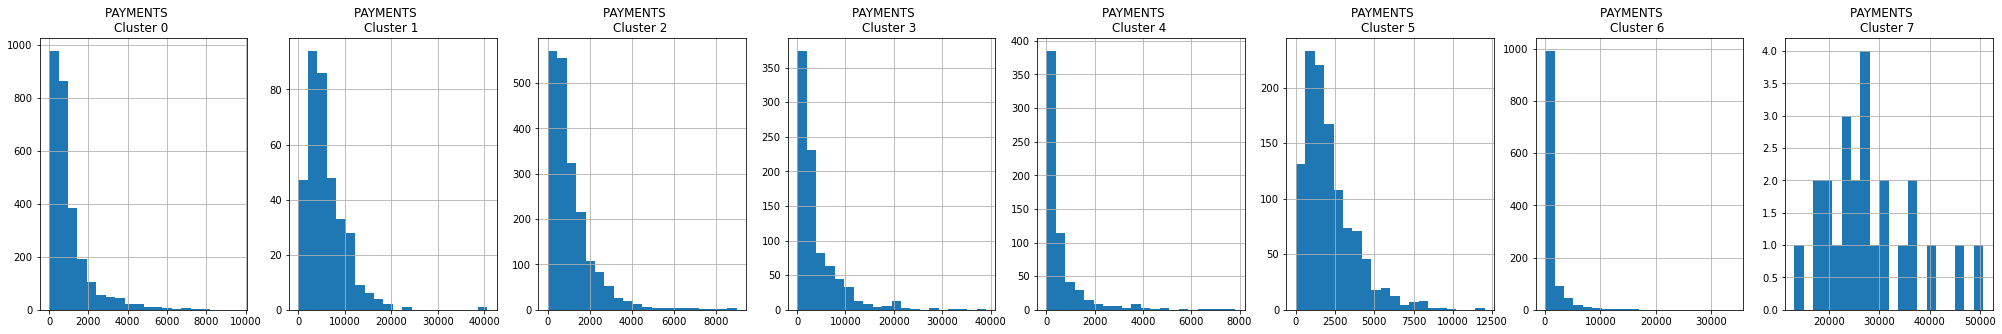

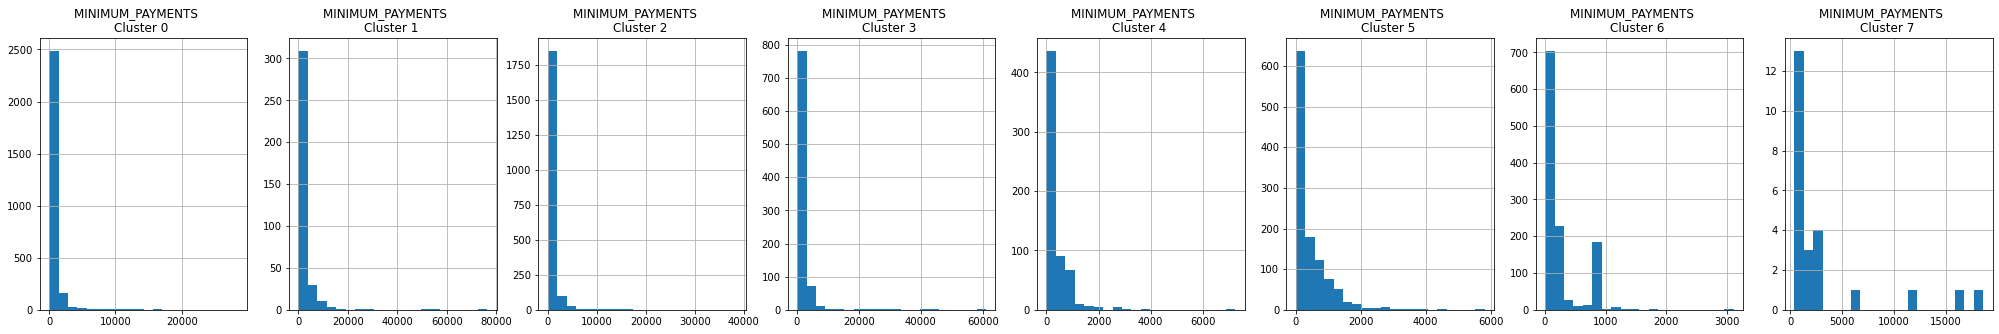

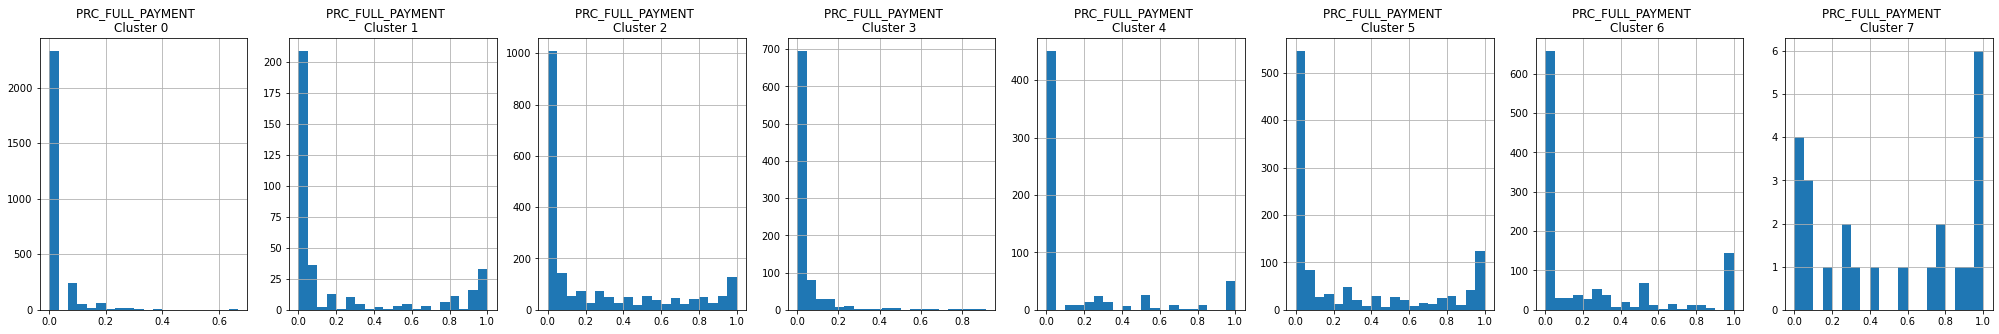

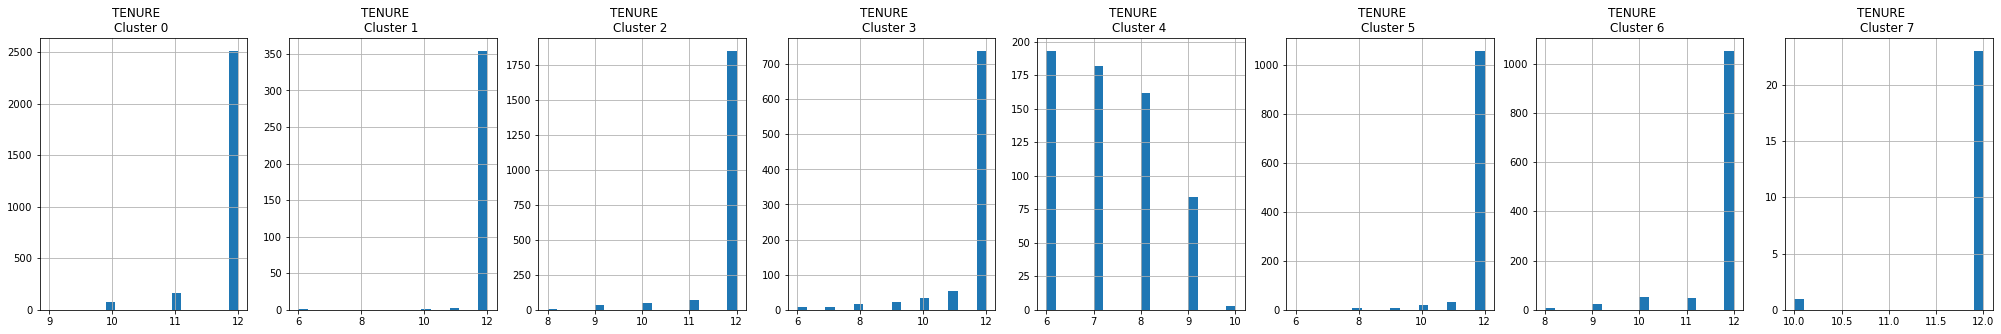

In [27]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## 3. Principal component analysis for the 8 calculated clusters

#### (a) Obtainment of two principal components and development of a dataframe with these components

In [28]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

In [29]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076449,0
1,-1.138297,2.506502,3
2,0.969684,-0.383559,5
3,-0.873629,0.043169,0
4,-1.599434,-0.688582,0


#### (b) Principal component analysis scatter-plot

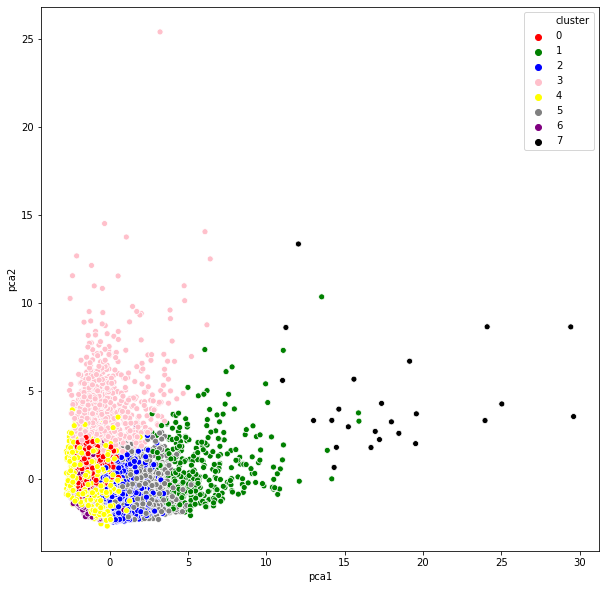

In [30]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

## 4. Dimensionality reduction with autoencoders

#### (a) Model development

In [36]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))

#Development of the encoder network (artificial neural network)

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

#Development of the encoded layer
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

#Development of the decoder network
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#Build the autoencoder
autoencoder = Model(input_df, decoded)

#Encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

#Compile the model using 'adam optimizer' and the loss is specified as mean squared error
autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

**Comment:** Keras API is utilized for this task.

#### (b) Autoencoder training for 25 epocs

In [33]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 16ms/step - loss: 0.6541: 0
Epoch 2/25
70/70 [==============================] - 1s 16ms/step - loss: 0.3345
Epoch 3/25
70/70 [==============================] - 1s 16ms/step - loss: 0.2483
Epoch 4/25
70/70 [==============================] - 1s 16ms/step - loss: 0.2194
Epoch 5/25
70/70 [==============================] - 1s 16ms/step - loss: 0.2035
Epoch 6/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1755
Epoch 7/25
70/70 [==============================] - 1s 19ms/step - loss: 0.1601
Epoch 8/25
70/70 [==============================] - 1s 18ms/step - loss: 0.1610
Epoch 9/25
70/70 [==============================] - 1s 18ms/step - loss: 0.1412
Epoch 10/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1322
Epoch 11/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1359
Epoch 12/25
70/70 [==============================] - 1s 16ms/step - loss: 0.1208
Epoch 13/25
70/70 [===============

In [34]:
autoencoder.save_weights('autoencoder.h5')

#### (c) Model reduction from 17 features down to 10 features by using the autoencoder

In [38]:
pred = encoder.predict(creditcard_df_scaled)

In [39]:
pred.shape

(8950, 10)

#### (d) K-Means Clustering on the new reduced model

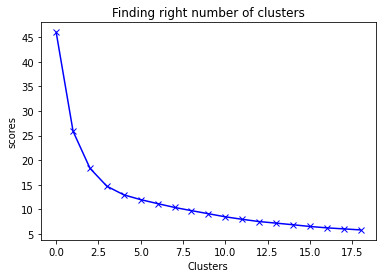

In [40]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

**Comment:** By using the elbow method we pick number of clusters equal to 4

In [67]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [72]:
kmeans.cluster_centers_.shape

(4, 17)

In [71]:
cluster_centers_auto = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers_auto = scaler.inverse_transform(cluster_centers)
cluster_centers_auto = pd.DataFrame(data = cluster_centers_auto, columns = [creditcard_df.columns])
cluster_centers_auto

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.856634e+09,1.139686,1.105496e+09,5.291642e+08,4.139925e+07,3.388626e+09,0.711229,0.270417,0.519664,0.168361,165.656650,2086.407268,4.476109e+10,8.391120e+09,4.535722e+09,0.200414,48.214417
1,1.625761e+10,1.140493,2.878490e+10,9.827415e+09,2.241228e+09,2.863807e+09,0.841367,0.321911,0.646624,0.165347,130.106239,57128.106604,1.218983e+11,4.928525e+10,1.299607e+10,0.217931,48.366713
2,3.488824e+09,1.138737,4.242317e+09,5.186298e+08,6.066847e+08,9.690590e+08,0.830598,0.270602,0.642852,0.163814,62.480859,12398.332188,4.682410e+10,9.314861e+09,4.235230e+09,0.219817,48.169446
3,2.188262e+10,1.139564,2.388365e+09,8.974977e+08,1.618329e+08,2.275933e+10,0.734670,0.275182,0.540114,0.182978,787.469568,5239.272418,1.084521e+11,3.387139e+10,1.130039e+10,0.201934,47.726023
4,3.769930e+09,1.129719,1.770799e+09,6.526265e+08,1.241828e+08,4.929362e+09,0.752991,0.273265,0.552696,0.170076,176.998028,3512.084733,3.239041e+10,5.001332e+09,2.049173e+09,0.212158,39.885974
5,5.609799e+09,1.139638,9.820891e+09,4.680037e+09,3.704652e+08,1.268638e+09,0.829335,0.331153,0.577732,0.164289,72.113812,18910.981476,8.044263e+10,1.809561e+10,2.712235e+09,0.222855,48.203067
6,4.606328e+08,1.105820,1.553618e+09,5.582646e+08,1.130977e+08,1.356812e+09,0.730232,0.269105,0.539240,0.163427,57.175947,3027.826526,5.120829e+10,9.880211e+09,1.450004e+09,0.218950,48.036736
7,2.342072e+10,1.138846,1.245105e+11,6.027065e+10,4.415542e+09,6.820005e+09,0.833579,0.337820,0.623128,0.164552,141.846181,79437.309209,2.129279e+11,2.340346e+11,1.774342e+10,0.242405,48.272344


In [81]:
cluster_centers_auto = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])


In [79]:
cluster_centers_auto = scaler.inverse_transform(cluster_centers_auto)
cluster_centers_auto = pd.DataFrame(data = cluster_centers_auto, columns = [creditcard_df.columns])
cluster_centers_auto

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595


**Comment:** Now the dataset is clustered into 4 clusters.

#### (e) Dataframe updated with the new clustering assignments

In [49]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


#### (f) Principal component analysis on the new dataframe

In [46]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.058910,0.009001,0
1,-0.051369,0.007883,0
2,0.077450,-0.028115,3
3,-0.060576,0.009391,0
4,-0.044264,0.003522,0


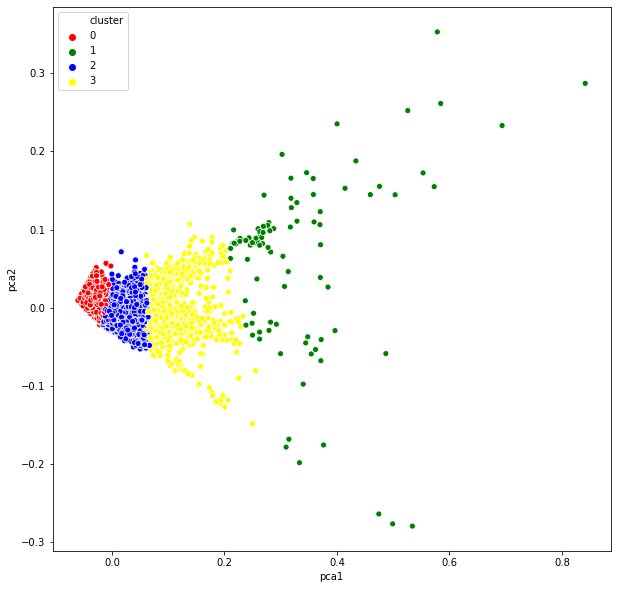

In [50]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

**Comment:** Here is the developed PCA scatter plot after the dimensionality reduction is performed.

## 5. Final Clustering Results Discussion

#### (a) Cluster characteristics

In [80]:
cluster_centers_auto

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595


## Comments:

* 1st Customer Cluster (row #3): (**Transactors**) Those are the customers who pay the least amount of interest charges and are careful with their money. Some characteristics that help us distinguish this cluster are the lowest balance (895 USD) and cash advance (596 USD) and percentage of full payments equal to 27%. 
* 2nd Customer Cluster (row #1):**(Revolvers)**.  Those are customers who use their credit card as a loan (most lucrative sector). Some characteristics that help us distinguish this cluster are the highest balance (4600 USD) and cash advance (4520 USD), low purchase frequency(0.28), high cash advance frequency (0.48), high cash advance transactions (14.3) and low percentage of full payment (3%)
* 3rd Customer Cluster (row #0):**(VIP/Prime)**. Some characteristics that help us distinguish this cluster are the high credit limit (~9.5k USD) and the highest percentage of full payment (0.29).
* 4th Customer Cluster (row #2): Remaining customers

#### (b) Histogram cluster comparison

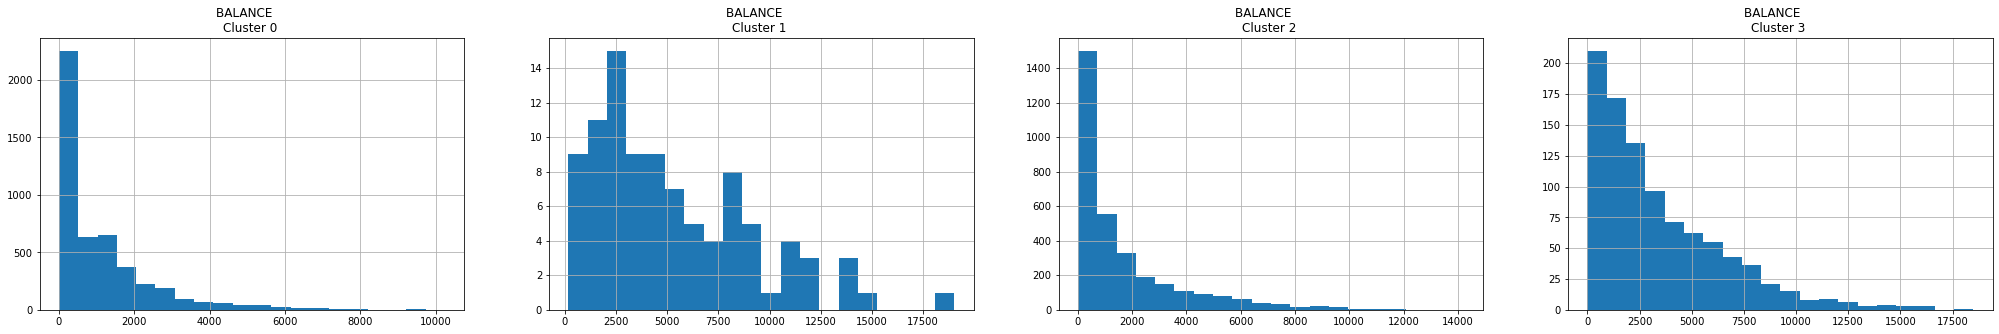

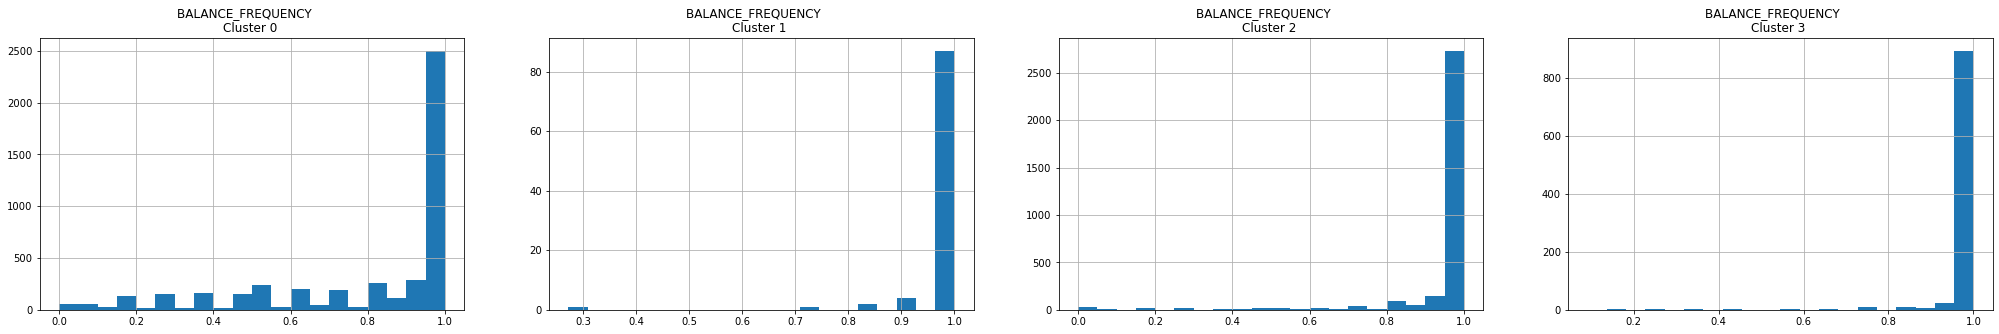

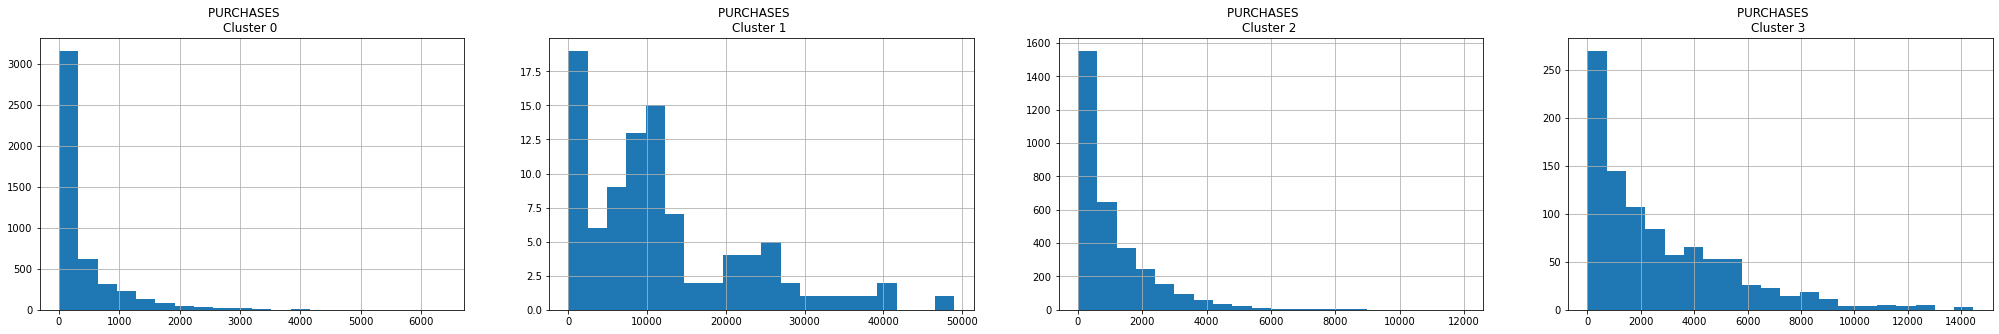

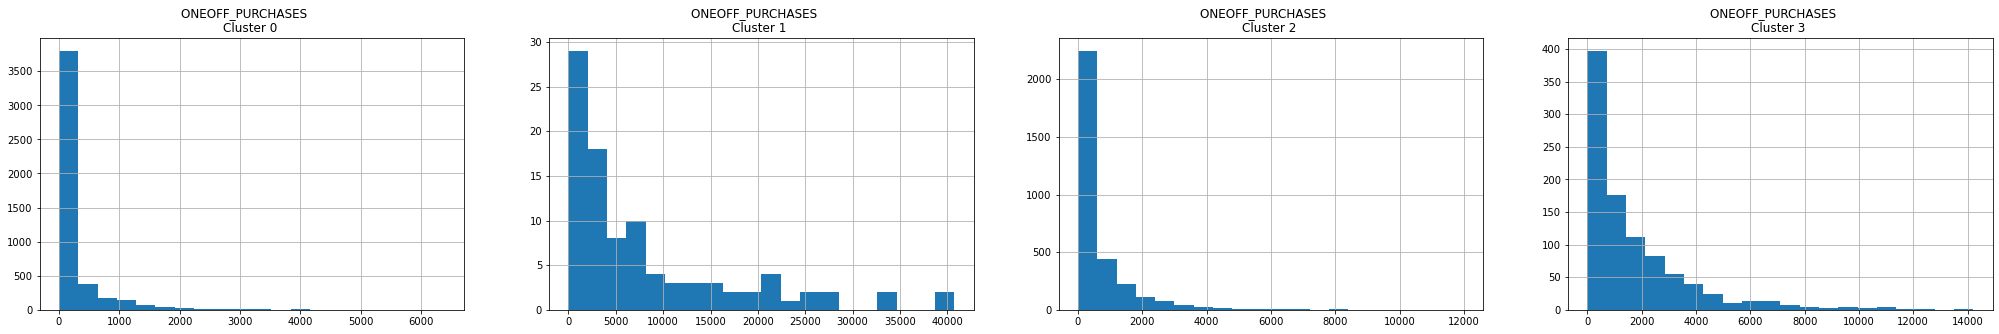

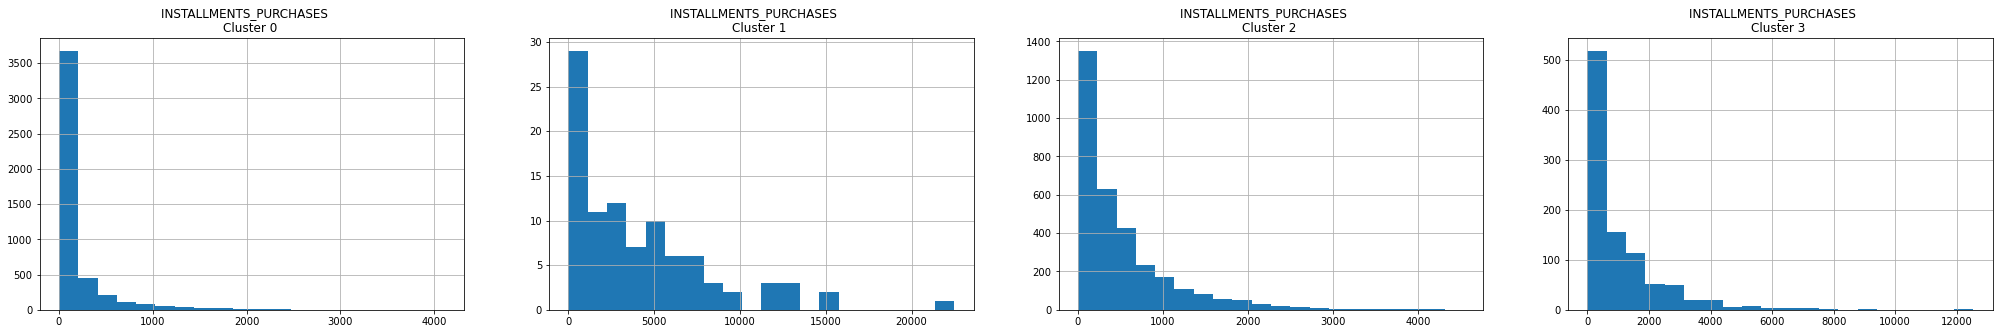

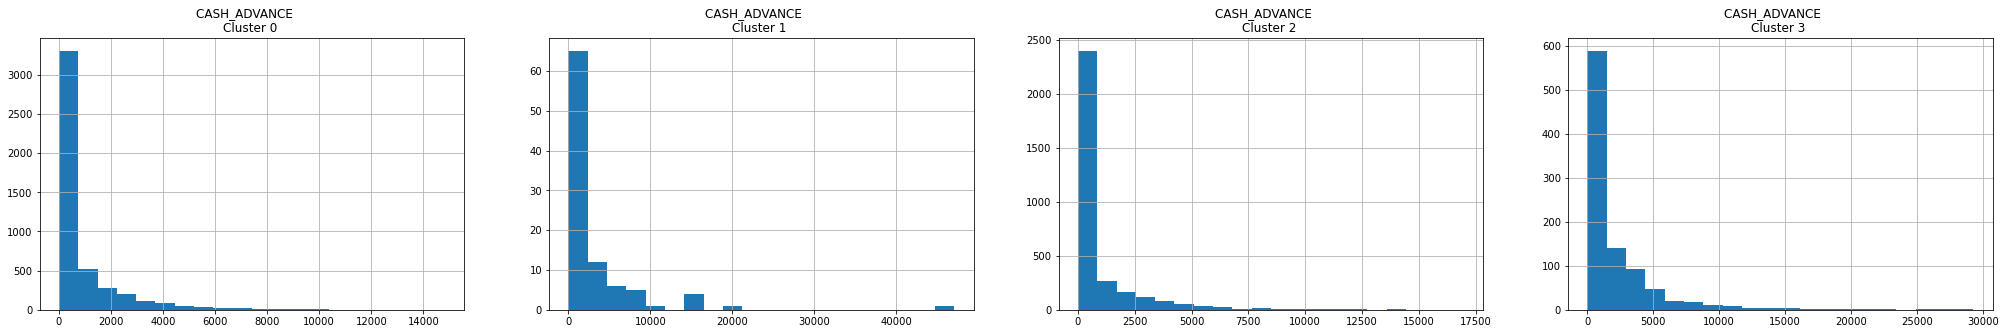

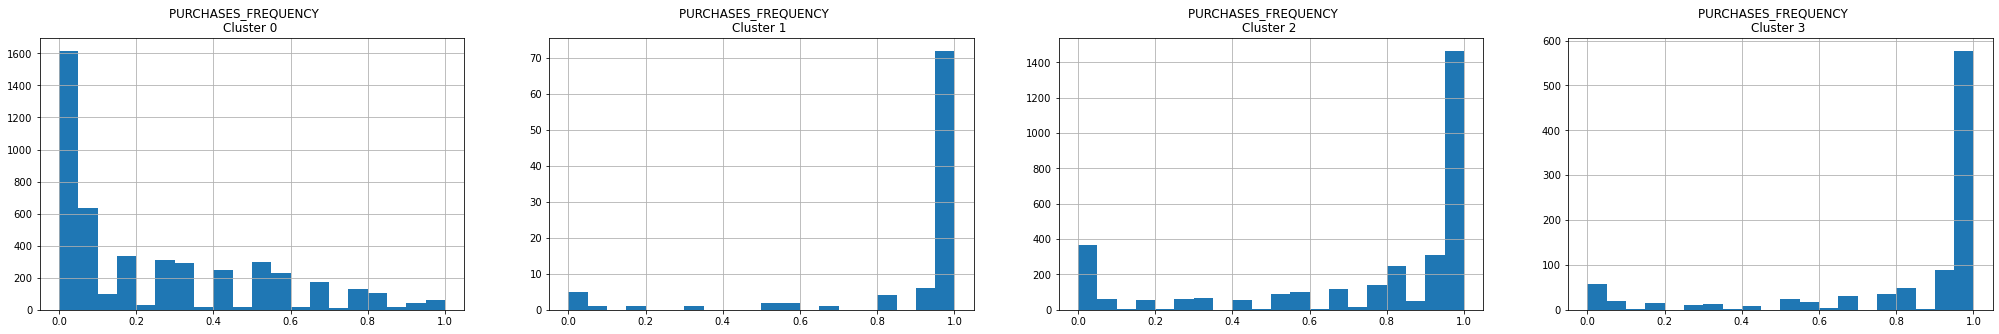

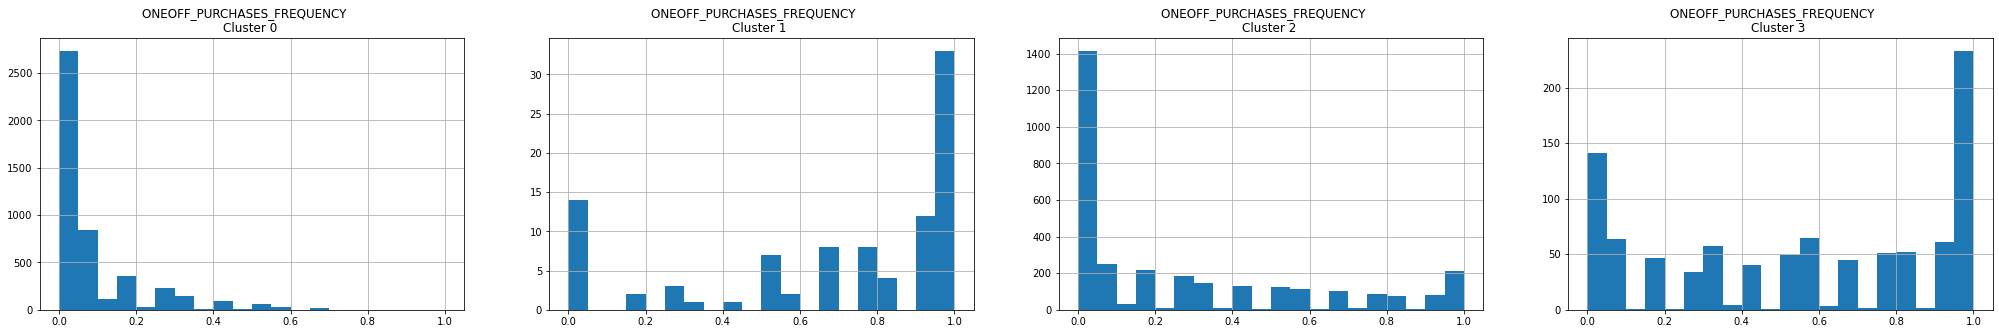

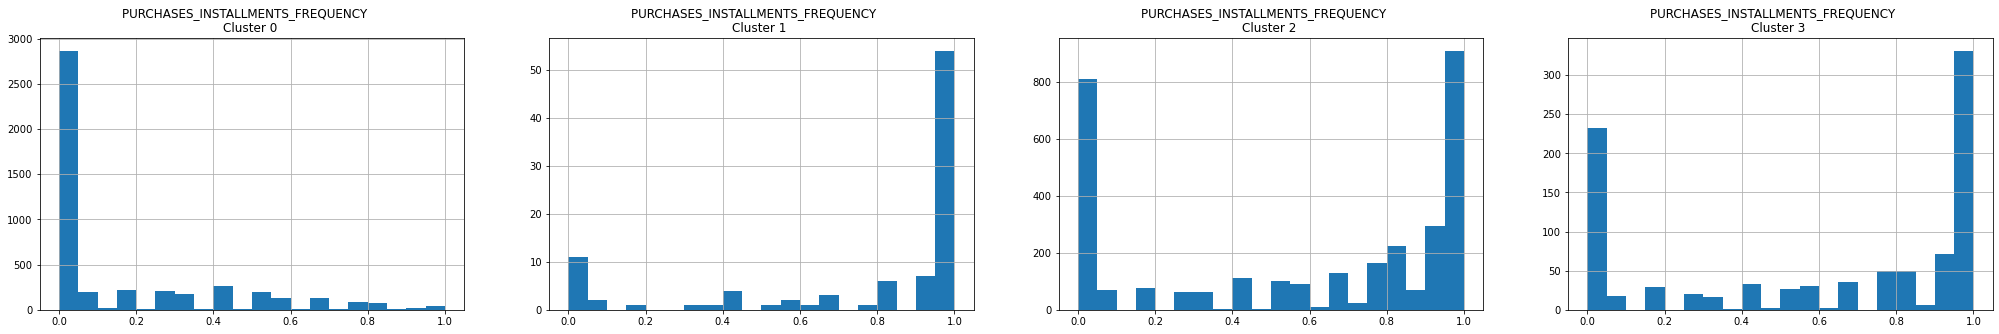

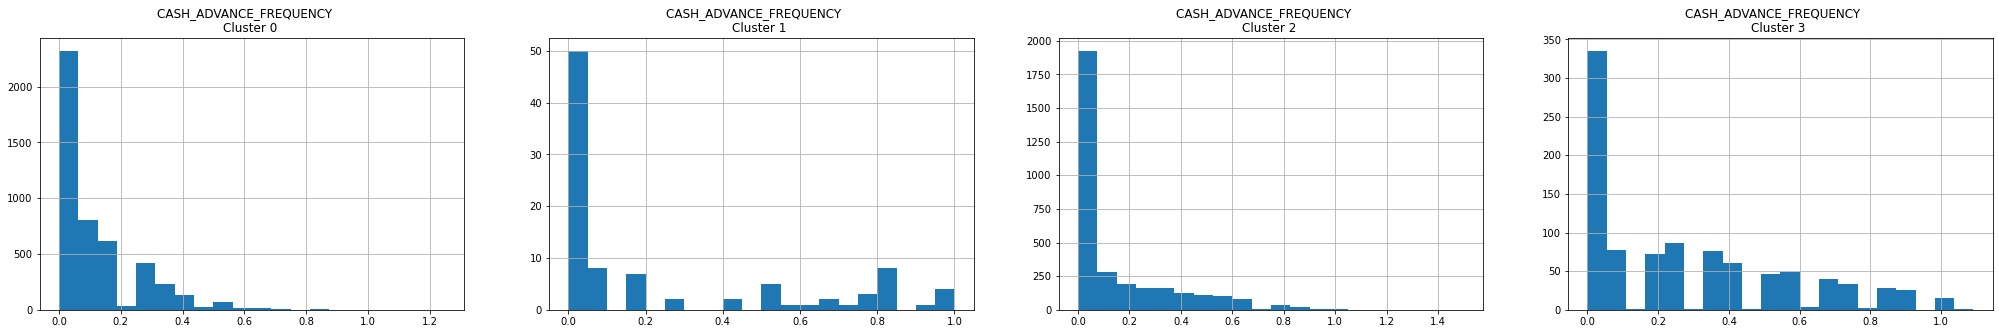

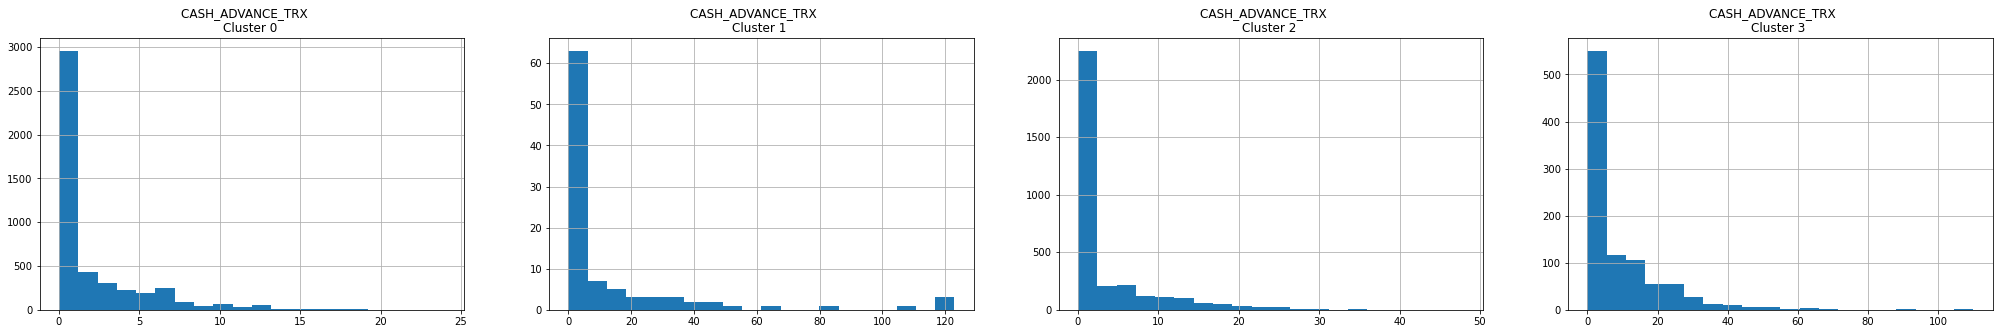

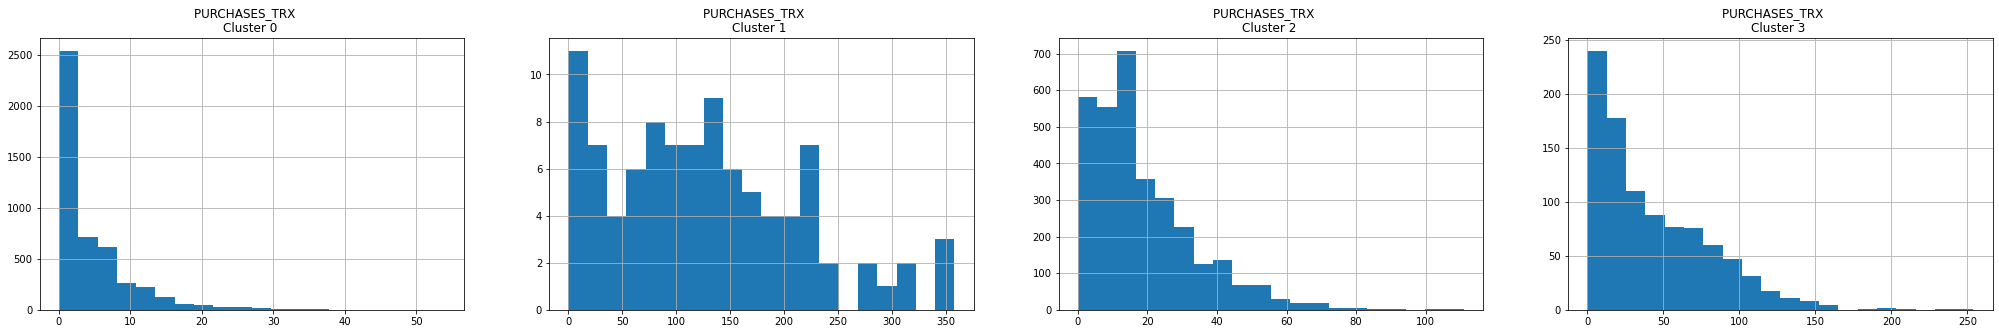

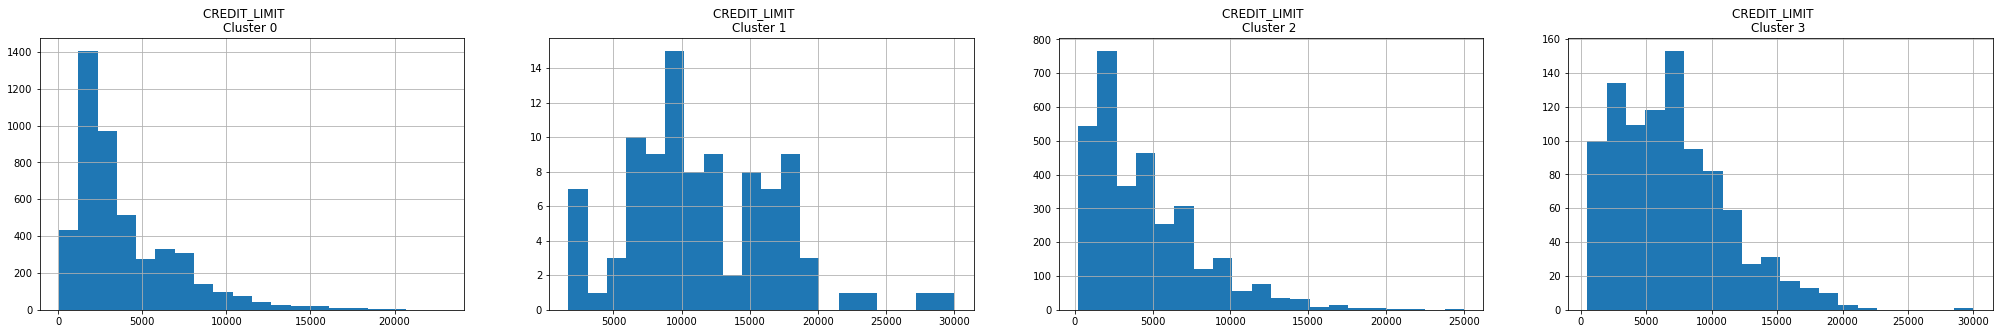

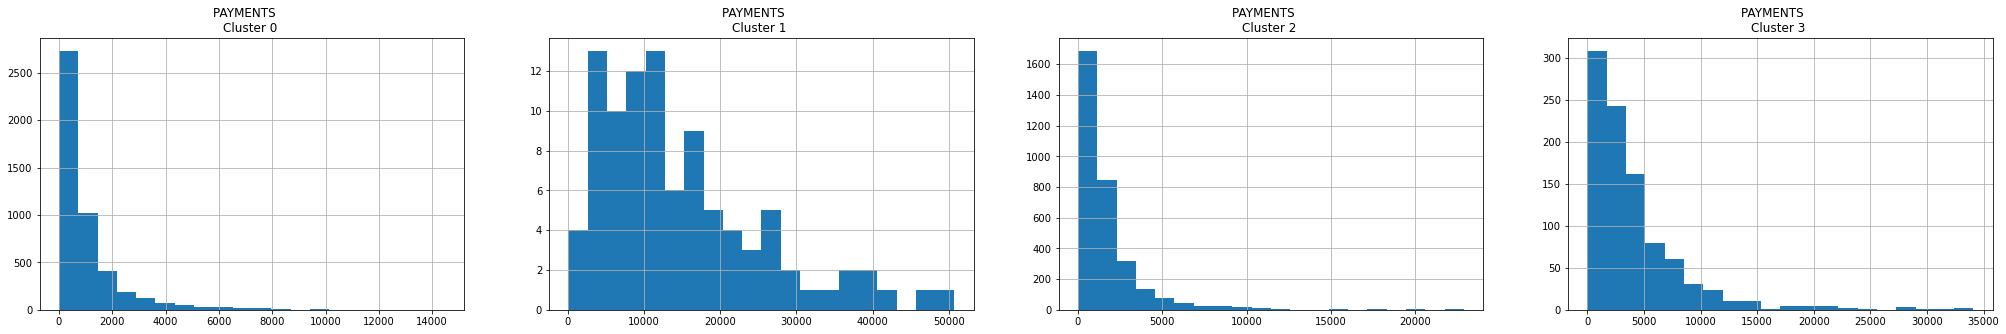

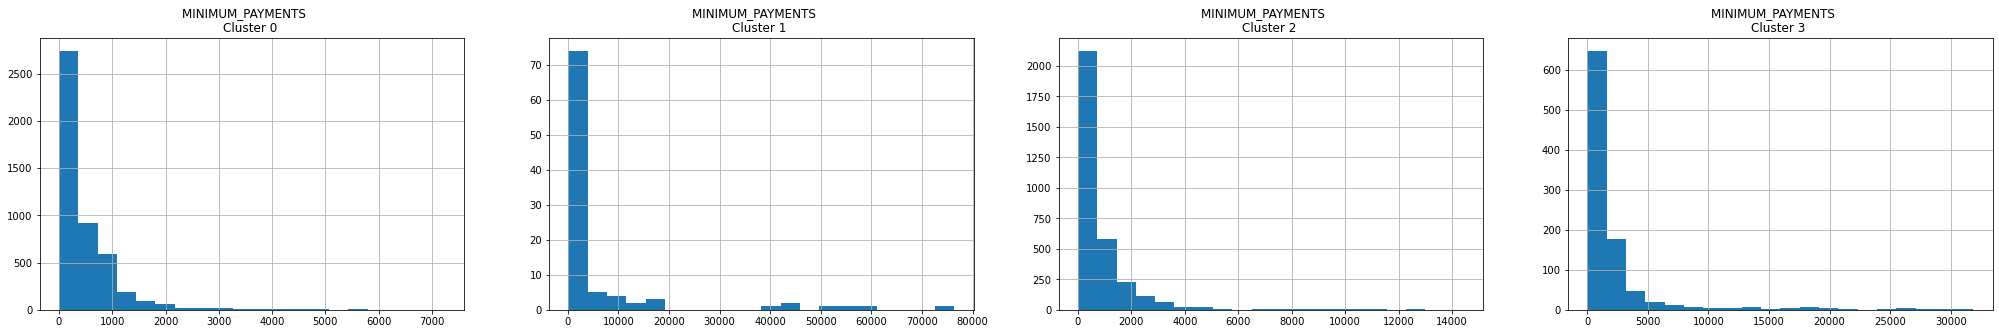

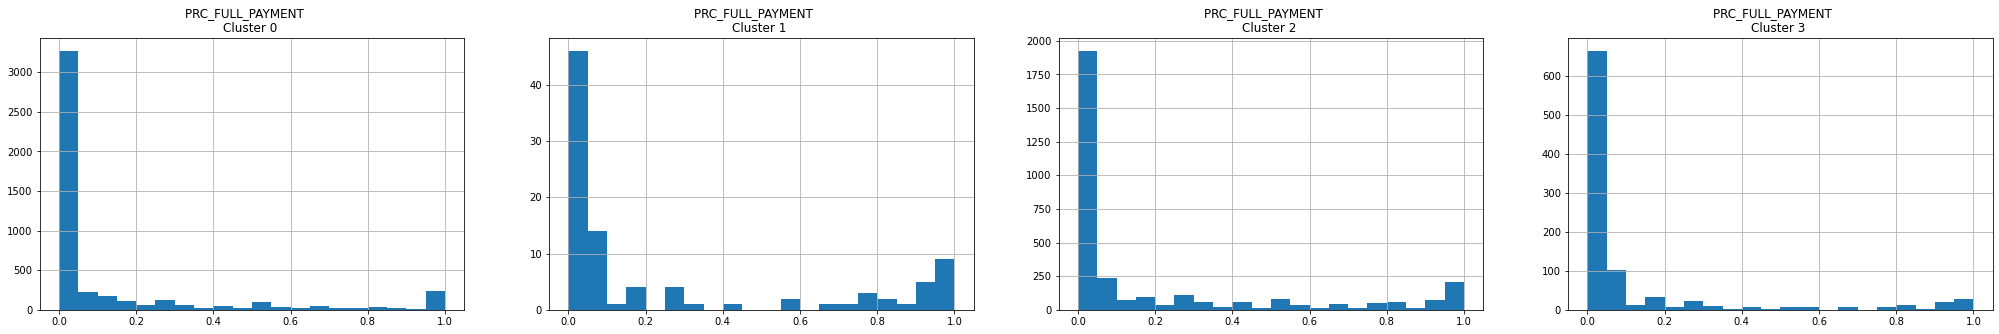

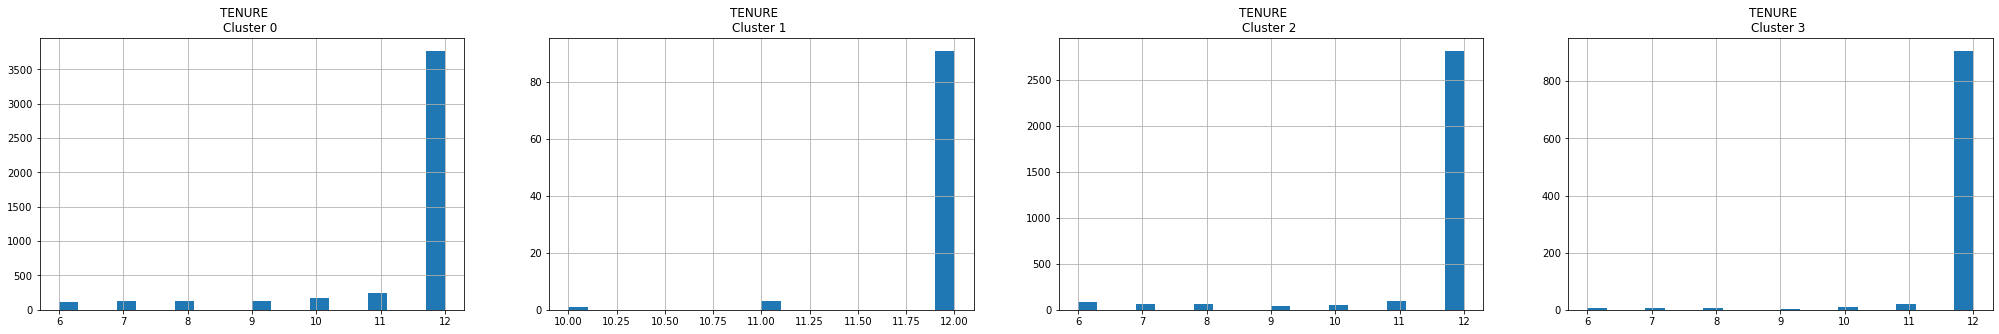

In [87]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  plt.show()


**Comment:** In this project we managed to cluster the bank's customers into 4 different clusters and therefore the marketing campaign can be launched successfully.